In [1]:
2+2

4

In [2]:
#from collections import defaultdict
#from pathlib import Path
import json

import os 
import time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
russell_df = pd.read_csv('russell_3000_index.csv')

ticker_list = russell_df['Ticker']

In [4]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [5]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker XTSLA threw an error
Ticker USD threw an error
Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
Ticker MSFUT threw an error
Ticker ESU2 threw an error
Ticker RTYU2 threw an error
This code took 50.353553771972656 seconds


In [6]:
starter_df.reset_index(inplace=True,drop=True)

In [18]:
starter_df.head(3)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN


In [12]:
'Chief' in starter_df['position'][1]

True

In [41]:
ceo_title_list = ['CHIEF EXECUTIVE','CEO']
cfo_title_list = ['CHIEF FINANC','CFO']

In [42]:
ceo_regstr = '|'.join(ceo_title_list)
cfo_regstr = '|'.join(cfo_title_list)

In [43]:
ceo_regstr

'CHIEF EXECUTIVE|CEO'

In [44]:
# https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)

In [53]:
ceo_2021_df = starter_df[(starter_df['CEO']==True) & (starter_df['year']==2021)]
ceo_2021_df.reset_index(inplace=True)

cfo_2021_df = starter_df[(starter_df['CFO']==True) & (starter_df['year']==2021)]
cfo_2021_df.reset_index(inplace=True)

<AxesSubplot:xlabel='salary', ylabel='Count'>

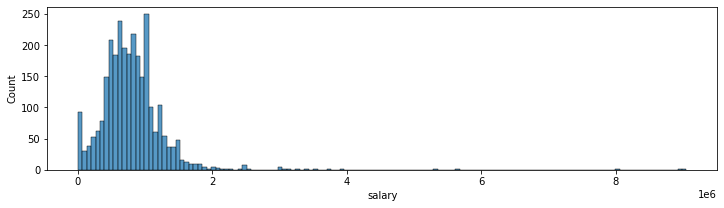

In [59]:
plt.figure(figsize=(12,3))
sns.histplot(ceo_2021_df[ceo_2021_df['salary']<10000000]['salary'])

<AxesSubplot:xlabel='salary'>

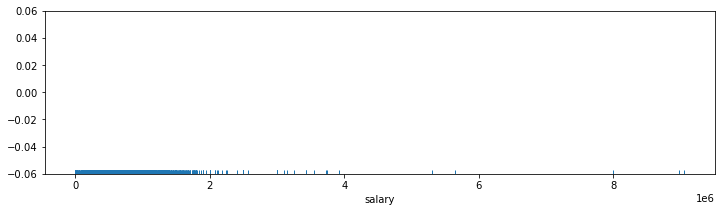

In [60]:
plt.figure(figsize=(12,3))
sns.rugplot(ceo_2021_df[ceo_2021_df['salary']<10000000]['salary'])

Text(0, 0.5, 'CEO')

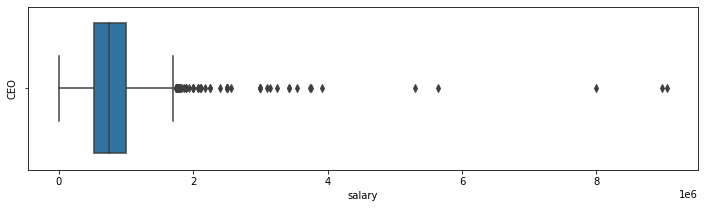

In [64]:
plt.figure(figsize=(12,3))
sns.boxplot(x=ceo_2021_df[ceo_2021_df['salary']<10000000]['salary'])
plt.ylabel('CEO')

<AxesSubplot:xlabel='salary', ylabel='nonEquityIncentiveCompensation'>

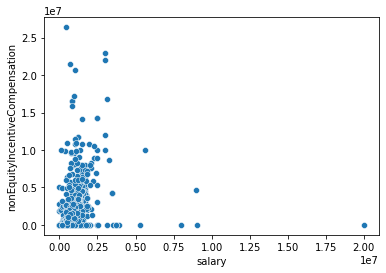

In [67]:
sns.scatterplot(data=ceo_2021_df,x='salary',y='nonEquityIncentiveCompensation')